# Fitness Classes Data Cleaning and Preprocessing Notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Load Data

In [2]:
df1 = pd.read_csv("Cult's Fitness_Classes/Fitness_Classes_Data/Fitness Classes Data/Classes April-May 2018.csv")
df2 = pd.read_csv("Cult's Fitness_Classes/Fitness_Classes_Data/Fitness Classes Data/Classes June 2018.csv")

# Convert date columns to datetime format

In [3]:
df1["BookingEndDateTime"] = pd.to_datetime(
    df1["BookingEndDateTime (Month / Day / Year)"],
    format="%d-%b-%y"
)

df2["BookingEndDateTime"] = pd.to_datetime(
    df2["BookingEndDateTime (Month / Day / Year)"],
    format="%d-%b-%y"
)

# Drop old column after conversion

In [4]:
df1.drop(columns=["BookingEndDateTime (Month / Day / Year)"], inplace=True)
df2.drop(columns=["BookingEndDateTime (Month / Day / Year)"], inplace=True)

# Handle missing values

In [5]:
print("Missing prices before:", df1["Price (INR)"].isna().sum())
df1.dropna(subset=["Price (INR)"], inplace=True)

Missing prices before: 18


# Merge datasets

In [6]:
df = pd.concat([df1, df2], ignore_index=True)

# Remove duplicates if any

In [7]:
df.drop_duplicates(inplace=True)

# Extract Month-Year for grouping

In [8]:
df["Month_Year"] = df["BookingEndDateTime"].dt.to_period("M")

# EDA - Average Price per Month

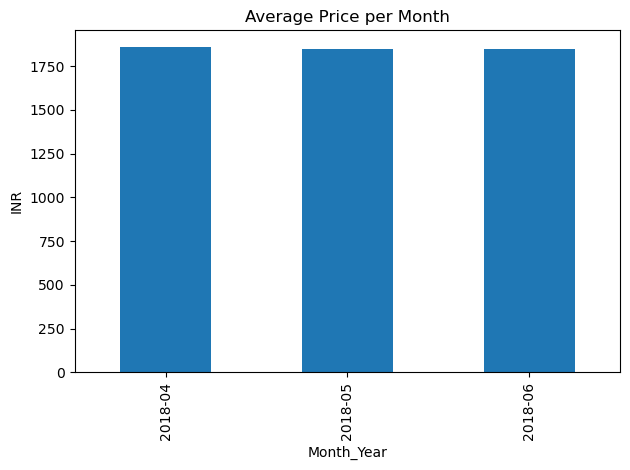

In [9]:
monthly_avg = df.groupby("Month_Year")["Price (INR)"].mean()
monthly_avg.plot(kind="bar", title="Average Price per Month", ylabel="INR")
plt.tight_layout()
plt.show()

# EDA - Price Trend Over Time

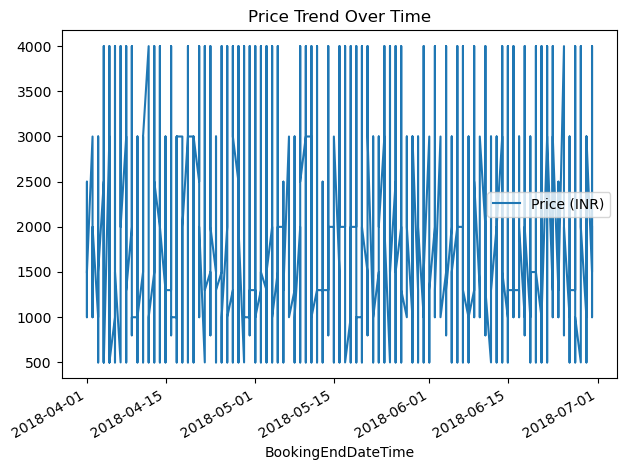

In [10]:
df_sorted = df.sort_values("BookingEndDateTime")
df_sorted.plot(x="BookingEndDateTime", y="Price (INR)", title="Price Trend Over Time")
plt.tight_layout()
plt.show()

# Histograms of price distribution

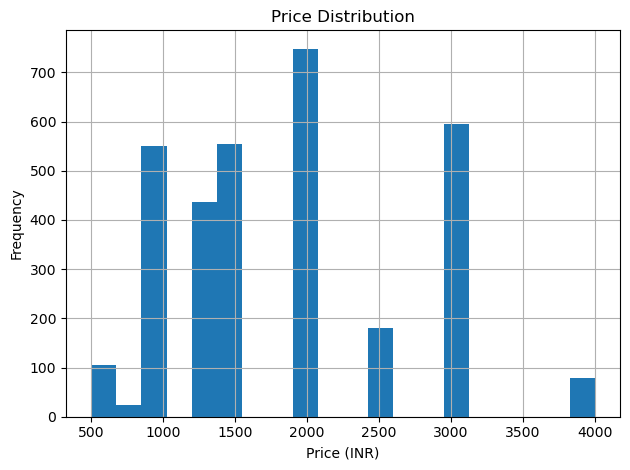

In [11]:
df["Price (INR)"].hist(bins=20)
plt.title("Price Distribution")
plt.xlabel("Price (INR)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Boxplot for outlier detection

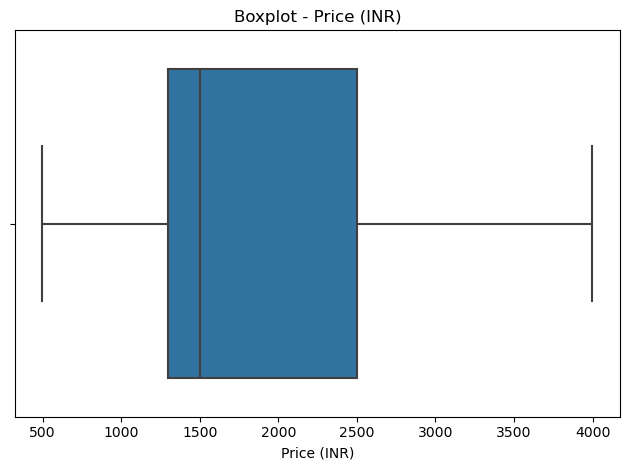

In [12]:
sns.boxplot(x=df["Price (INR)"])
plt.title("Boxplot - Price (INR)")
plt.tight_layout()
plt.show()

# Summary statistics

In [13]:
print("\nDescriptive statistics:")
print(df.describe())


Descriptive statistics:
        MaxBookees  Number Booked  Price (INR)             BookingEndDateTime
count  3271.000000    3271.000000  3271.000000                           3271
mean     32.224396      17.125955  1852.714460  2018-05-16 11:00:47.324977152
min       2.000000       1.000000   499.000000            2018-04-01 00:00:00
25%      24.000000      10.000000  1299.000000            2018-04-24 00:00:00
50%      30.000000      16.000000  1499.000000            2018-05-16 00:00:00
75%      35.000000      24.000000  2499.000000            2018-06-08 00:00:00
max      70.000000      64.000000  3999.000000            2018-06-30 00:00:00
std      15.121398       9.515352   792.636673                            NaN


# Top Activity Descriptions

In [14]:
print("\nTop 10 Activity Descriptions:")
print(df["ActivityDescription"].value_counts().head(10))


Top 10 Activity Descriptions:
ActivityDescription
Body Conditioning 10-11am    39
Body Balance 11-12pm         35
Aquafit 7.00-8.00pm          35
Body Combat 7.00-8.00pm      33
Jnr Gym Appoint 4-5pm        31
Studio Cyc 5.00-5.50pm       26
20-20-20 9.30-10.30am        26
Yoga 10.30-11.30am           26
Studio Cyc 7.05-7.55am       26
Aquafit 7.15-8.15pm          26
Name: count, dtype: int64


# Top Sites

In [15]:
print("\nTop 5 Sites:")
print(df["ActivitySiteID"].value_counts().head(5))



Top 5 Sites:
ActivitySiteID
HXP    771
SBP    731
BRP    727
NBL    529
TSC    513
Name: count, dtype: int64


# Final Quality Summary Report

In [16]:
print("""
===== Quality Summary =====
- Missing prices removed: 18 rows dropped from df1.
- No duplicates found after merging.
- Date parsing successful; range: {} to {}
- Price range: {} to {} INR
- Dataset shape after cleaning: {}
===========================
""".format(
    df["BookingEndDateTime"].min().date(),
    df["BookingEndDateTime"].max().date(),
    df["Price (INR)"].min(),
    df["Price (INR)"].max(),
    df.shape
))


===== Quality Summary =====
- Missing prices removed: 18 rows dropped from df1.
- No duplicates found after merging.
- Date parsing successful; range: 2018-04-01 to 2018-06-30
- Price range: 499.0 to 3999.0 INR
- Dataset shape after cleaning: (3271, 8)



In [20]:
df.to_excel("Cleaned_Fitness_Classes_Data.xlsx", index=False)

In [17]:
median_price = df["Price (INR)"].median()
median_booked = df["Number Booked"].median()
median_capacity = df["MaxBookees"].median()

print("Median Price:", median_price)
print("Median Number Booked:", median_booked)
print("Median Max Capacity:", median_capacity)

Median Price: 1499.0
Median Number Booked: 16.0
Median Max Capacity: 30.0
